<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Verlet Integration

### Modules - Ordinary Differential Equations
<section class="post-meta">
By Magnus A. Gjennestad, Vegard Hagen, Aksel Kvaal, Morten Vassvik, Trygve B. Wiig and Peter Berg
</section>
Last edited: March 11th 2018 
___

Can we solve Newton's second law
\begin{equation}
m\frac{d^2}{dt^2}x(t)=F(x(t),t),
\label{eq:1}
\end{equation}
a second-order ODE, without resorting to Euler's method which re-casts the problem
as two coupled, first-order ODEs?

Here, we employ the initial condition $x(t_0)=x_0$ and $v(t_0)=v_0$, and restrict our analysis to one dimension. 
Also, we assume for now that the force $F$ does not depend on the velocity $v$.

We can divide equation \eqref{eq:1} by the mass $m$ and write instead
$$
\frac{d^2}{dt^2}x(t)=a(x(t),t),
$$
where $a(x,t)$ is the acceleration.

__Example 1:__
\begin{equation}
\frac{d^2x}{dt^2}=-x+x^3+0.1\cos(t),
\label{eq:2}
\end{equation}
with the initial conditions $x(t_0)=0$ and $v(t_0)=0$.

In a fairly crude way, we now approximate the second derivative of $x(t)$ with respect
to time, i.e. the acceleration, by
\begin{equation}
\begin{aligned}
\frac{d^2x}{dt^2}\bigg|_{t=t_n}=\frac{dv}{dt}\bigg|_{t=t_n}&
\approx&\frac{v(t_n+h/2)-v(t_n-h/2)}{h} \\
&\approx&\frac{
 \frac{x(t_n+h)-x(t_n)}{h}
-\frac{x(t_n)-x(t_n-h)}{h}
}{h},
\end{aligned}
\label{eq:3}
\end{equation}
where we used the __central difference approximation(s)__
$$
\frac{dv}{dt}\bigg|_{t=t_n}\approx\frac{v(t_n+h/2)-v(t_n-h/2)}{h}
$$
with
$$v(t_n+h/2)\approx \frac{x(t_n+h)-x(t_n)}{h},\\
v(t_n-h/2)\approx \frac{x(t_n)-x(t_n-h)}{h}.$$


The above formulation follows the usual discretization
$$
t_n=t_0+n\cdot h~~~\mathrm{with}~~~n=0,1,2,3,...,N.
$$
Again, this suggests the following abbreviation: $x_n=x(t_n)$.

With this in mind, substitution of expression \eqref{eq:3} into equation \eqref{eq:2} 
and subsequent multiplication by $h^2$ yields
$$
x_{n+1}-2x_n+x_{n-1}=h^2\left[-x_n+x_n^3+0.1\cos(t_n)\right],
$$
where we evaluated  equation \eqref{eq:2} at $t=t_n$. This results in the following 
recursive formulation of the solution
\begin{equation}
x_{n+1}=2x_n-x_{n-1}+h^2\left[-x_n+x_n^3+0.1\cos(t_n)\right]
\label{eq:4}
\end{equation}
with $x_0=0$ and $v_0=0$.

### Verlet Integration

More rigorously, one can derive the generalized version of the recursive formula 
\eqref{eq:4}, namely 

\begin{equation}
\boxed{x_{n+1}=2x_n-x_{n-1}+h^2 a(x_n,t_n),}
\label{eq:5}
\end{equation}

by use of Taylor expansions about $x(t_n)$ (see Appendix). 
The Taylor-expansion method tells us that the local error we make in using the approximation \eqref{eq:5}, 
scales like $h^4$. This is, perhaps, surprisingly good.

The method \eqref{eq:5} is called __Verlet integration__.
Often, it includes an acceleration term which does not depend explicitly on time:
$a=a(x(t))$. 

The remaining problem is now to use equation \eqref{eq:4} at $t=t_0$, i.e. at $n=0$,
since we do not know the value of $x$ for $t<0$, in particular $x_{-1}$.
Here, one can estimate the first value $x_1$ after the starting point $t_0$ by 
Taylor expansion of $x(t)$ at $t=t_0$:
$$
x_1=x_0+h v_0 + \frac{h^2}{2}a(x_0,t_0)+\mathcal{O}(h^3).
$$
In our example, this becomes ($x_0=0$, $v_0=0$, $t_0=0$)
\begin{equation}
x_1=x_0+h v_0 + \frac{h^2}{2}a(x_0,t_0)=\frac{h^2}{20}.
\label{eq:6}
\end{equation}
Thereafter, we can stick to the relation \eqref{eq:4} to find all other $x_n$.

(<u>Note</u>: The error of the approximation \eqref{eq:6} scales like $h^3$.)

Let's use \eqref{eq:4} and \eqref{eq:6} to solve \eqref{eq:2}:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Set common figure parameters
newparams = {'figure.figsize': (16, 6), 'axes.grid': True,
             'lines.linewidth': 1.5, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

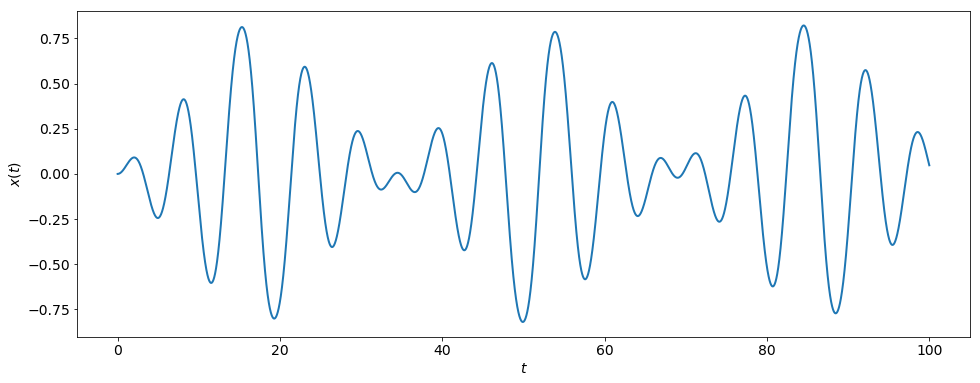

In [3]:
N = 100000 # number of steps
h = 0.001  # step size

t = np.zeros(N+1)
x = np.zeros(N+1)

# initial values
t_0 = 0
x_0 = 0
t[0] = t_0
x[0] = x_0

for n in range(N):
    # Second grid point:
    if n==0:
        t[n+1] = h
        x[n+1] = h**2/20.0
    # Verlet integration
    else:
        t[n+1] = t[n] + h
        x[n+1] = 2.0*x[n] - x[n-1] + h**2*(-x[n]+x[n]**3+0.1*np.cos(t[n]))

# Plot the solution
plt.plot(t,x)
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.grid();

Here we have chosen $h=0.001$ and $N=100\,000$,
and so $t_N=100$.
In the plot of $x(t)$, the discrete points have been connected
by straight lines.

#### Question

What if the force, and hence the acceleration, also depends on the velocity $v$?
In other words, let's look at
$$
\frac{d^2}{dt^2}x(t)=a(x(t),v(t),t),
$$
with the initial conditions $x(t_0)=x_0$ and $v(t_0)=v_0$.

We approximate the left-hand side at $t=t_n$ just like before, and we approximate 
the right-hand side by
$$
a(x_n,v_n,t_n)\approx a\left( x_n, \frac{x_{n+1}-x_{n-1}}{2h}, t_n \right),
$$
where we used a central difference approximation for $v_n$ again:
$$
\frac{dv}{dt}\bigg|_{t=t_n}\approx\frac{v(t_n+h)-v(t_n-h)}{2h}.
\label{eq:7}
$$

However, the error of the approximation \eqref{eq:7} scales like $h^2$, thereby 
reducing the overall accuracy of the method.

Again, we estimate
$$
x_1=x_0+h v_0 + \frac{h^2}{2}a(x_0,v_0,t_0).
$$
Thereafter, we now use
$$
x_{n+1}=2x_n-x_{n-1}+h^2 a\left( x_n, \frac{x_{n+1}-x_{n-1}}{2h}, t_n \right) .
$$
Note that we need to solve this equation for $x_{n+1}$ which is not always possible
in analytical form, i.e. in closed form, if the problem is nonlinear. 

Let us focus on a problem which is linear in $v$.

__Example 2__:
$$
\frac{d^2x}{dt^2}=-v-x^3
$$
with the initial conditions $x_0=x(0)=10$ and $v_0=v(0)=0$. 
Using our above formalism, this reads in discretized 
form
\begin{align*}
x_{n+1}&=2x_n-x_{n-1}+h^2 \left( -\frac{x_{n+1}-x_{n-1}}{2h}-x_n^3 \right) \\
\Rightarrow x_{n+1}&=\frac{2x_n-(1-h/2)\,x_{n-1}-h^2 x_n^3}{1+h/2}.
\end{align*}
When combined with $x_0=10$ and
$$
x_1=x_0+h v_0 + \frac{h^2}{2}a(x_0,v_0,t_0)=10-500 h^2,
$$
this determines the solution of the problem. This is implemented in the code below. In the code we choose $h=0.001$ and 
$N=3\,000$, and so $t_N=3.0$

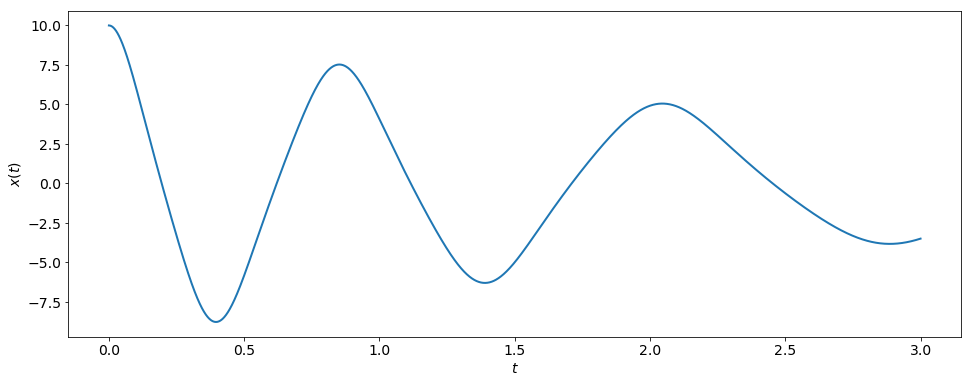

In [4]:
N = 3000 # number of steps
h = 0.001 # step size

t = np.zeros(N+1)
x = np.zeros(N+1)

# initial values
t_0 = 0
x_0 = 10
t[0] = t_0
x[0] = x_0

for n in range(N):
    # Second grid point:
    if n==0:
        t[n+1] = h
        x[n+1]= 10.0-500.0*h**2
    # Verlet integration
    else:
        t[n+1] = t[n] + h
        x[n+1] = (2.0*x[n]-(1.0-h/2)*x[n-1]-h**2*x[n]**3)/(1+h/2.0)

        
# Plot the solution
plt.plot(t,x)
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.grid();

### Summary

We have seen that there is more than one method (Euler's method) to solve ODEs.
Verlet integration is often used to solve Newton's second law. 
1. It provides higher accuracy than Euler's method.
2. It is more stable than Euler's method and
3. might require a nonlinear solve for $x_{n+1}$. 
4. It can be extended in a straightforward manner to three-dimensional 
motion.

### Appendix:  Derivation of Verlet Formula with Taylor Series

Given the dynamics of $x(t)$ at $t=t_n$, let us approximate the values 
$x_{n-1}=x(t_n-h)$ and $x_{n+1}=x(t_n+h)$ by use of Taylor series 
at $x_{n}=x(t_n)$:
\begin{eqnarray*}
x(t_n-h)&=&x(t_n)+v(t_n) \cdot (-h)+\frac{a(t_n)}{2}\cdot (-h)^2+\frac{b(t_n)}{6}\cdot 
(-h)^3+\mathcal{O}(h^4), \\ 
x(t_n+h)&=&x(t_n)+v(t_n)\,h+\frac{a(t_n)}{2}h^2+\frac{b(t_n)}{6}h^3+\mathcal{O}(h^4),
\end{eqnarray*}
with 
\begin{align*}
v(t_n)=\frac{dx}{dt}\bigg|_{t=t_n}, \quad 
a(t_n)=\frac{d^2x}{dt^2}\bigg|_{t=t_n}, \quad \text{and} \quad
b(t_n)=\frac{d^3x}{dt^3}\bigg|_{t=t_n}.
\end{align*}
Adding these two equations and subsequent re-arranging of terms yields 
$$ 
x(t_n+h)=2x(t_n)-x(t_n-h)+a(t_n)\,h^2+\mathcal{O}(h^4)
$$
or, in different notation,
$$
x_{n+1}=2 x_n-x_{n-1}+h^2\,a(t_n)+\mathcal{O}(h^4).
$$
This is our Verlet formula \eqref{eq:5} if we drop the higher-order terms $\mathcal{O}(h^4)$
and write $a(x(t_n),t_n)=a(x_n,t_n)$ instead of simply $a(t_n)$.